# Symmetric Polynomials

## Introduction

**Symmetric polynomials** are polynomials in multiple variables that remain invariant under any permutation of those variables. They form a cornerstone of algebraic combinatorics, representation theory, and invariant theory, with deep connections to Galois theory and the solvability of polynomial equations.

## Definition

A polynomial $f(x_1, x_2, \ldots, x_n) \in \mathbb{R}[x_1, \ldots, x_n]$ is **symmetric** if for any permutation $\sigma \in S_n$:

$$f(x_{\sigma(1)}, x_{\sigma(2)}, \ldots, x_{\sigma(n)}) = f(x_1, x_2, \ldots, x_n)$$

## Elementary Symmetric Polynomials

The **elementary symmetric polynomials** $e_k(x_1, \ldots, x_n)$ for $k = 0, 1, \ldots, n$ are defined as:

$$e_k(x_1, \ldots, x_n) = \sum_{1 \leq i_1 < i_2 < \cdots < i_k \leq n} x_{i_1} x_{i_2} \cdots x_{i_k}$$

Explicitly, for $n = 3$:
- $e_0 = 1$
- $e_1(x_1, x_2, x_3) = x_1 + x_2 + x_3$
- $e_2(x_1, x_2, x_3) = x_1 x_2 + x_1 x_3 + x_2 x_3$
- $e_3(x_1, x_2, x_3) = x_1 x_2 x_3$

## Generating Function

The elementary symmetric polynomials have a compact generating function:

$$\prod_{i=1}^{n}(1 + x_i t) = \sum_{k=0}^{n} e_k(x_1, \ldots, x_n) t^k$$

## Power Sum Symmetric Polynomials

The **power sum symmetric polynomials** are:

$$p_k(x_1, \ldots, x_n) = \sum_{i=1}^{n} x_i^k = x_1^k + x_2^k + \cdots + x_n^k$$

## Newton's Identities

Newton's identities establish a relationship between elementary symmetric polynomials and power sums:

$$k \cdot e_k = \sum_{i=1}^{k} (-1)^{i-1} e_{k-i} p_i$$

Or equivalently:

$$p_k = \sum_{i=1}^{k-1} (-1)^{i-1} e_i p_{k-i} + (-1)^{k-1} k \cdot e_k$$

## Fundamental Theorem of Symmetric Polynomials

**Theorem:** Every symmetric polynomial in $x_1, \ldots, x_n$ can be expressed as a polynomial in the elementary symmetric polynomials $e_1, e_2, \ldots, e_n$.

This theorem is foundational because it shows that $\{e_1, \ldots, e_n\}$ generates the ring of symmetric polynomials.

## Connection to Polynomial Roots (Vieta's Formulas)

If $r_1, r_2, \ldots, r_n$ are the roots of the polynomial:

$$P(x) = x^n + a_{n-1}x^{n-1} + \cdots + a_1 x + a_0$$

Then Vieta's formulas state:

$$a_{n-k} = (-1)^k e_k(r_1, \ldots, r_n)$$

This beautiful connection shows that the coefficients of a polynomial are (up to sign) the elementary symmetric polynomials in its roots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from math import comb

# Set up plotting style
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11

## Implementation of Symmetric Polynomials

We now implement functions to compute the elementary symmetric polynomials and power sum polynomials.

In [2]:
def elementary_symmetric(k, variables):
    """
    Compute the k-th elementary symmetric polynomial e_k(x_1, ..., x_n).
    
    e_k = sum of all products of k distinct variables
    
    Parameters:
    -----------
    k : int
        The degree of the elementary symmetric polynomial
    variables : array-like
        The variables (x_1, ..., x_n)
    
    Returns:
    --------
    float : The value of e_k
    """
    n = len(variables)
    if k == 0:
        return 1.0
    if k > n:
        return 0.0
    
    result = 0.0
    for combo in combinations(range(n), k):
        product = 1.0
        for idx in combo:
            product *= variables[idx]
        result += product
    return result


def power_sum(k, variables):
    """
    Compute the k-th power sum symmetric polynomial p_k(x_1, ..., x_n).
    
    p_k = x_1^k + x_2^k + ... + x_n^k
    
    Parameters:
    -----------
    k : int
        The power
    variables : array-like
        The variables (x_1, ..., x_n)
    
    Returns:
    --------
    float : The value of p_k
    """
    return sum(x**k for x in variables)


def complete_homogeneous_symmetric(k, variables):
    """
    Compute the k-th complete homogeneous symmetric polynomial h_k(x_1, ..., x_n).
    
    h_k = sum of all monomials of total degree k (with repetition allowed)
    
    Parameters:
    -----------
    k : int
        The degree
    variables : array-like
        The variables (x_1, ..., x_n)
    
    Returns:
    --------
    float : The value of h_k
    """
    n = len(variables)
    if k == 0:
        return 1.0
    
    result = 0.0
    for combo in combinations(range(n + k - 1), k):
        # Convert combination to multiset
        indices = []
        prev = -1
        var_idx = 0
        for c in combo:
            var_idx += c - prev - 1
            if var_idx >= n:
                break
            indices.append(var_idx)
            prev = c
        else:
            product = 1.0
            for idx in indices:
                product *= variables[idx]
            result += product
    return result

## Demonstration: Elementary Symmetric Polynomials

Let's verify our implementation with concrete examples.

In [3]:
# Example with 4 variables
x = np.array([1, 2, 3, 4])
n = len(x)

print("Variables: x =", x)
print("\nElementary Symmetric Polynomials:")
print("="*50)

for k in range(n + 1):
    e_k = elementary_symmetric(k, x)
    print(f"e_{k}(x) = {e_k:.0f}")

print("\nVerification:")
print(f"e_0 = 1 (by definition)")
print(f"e_1 = 1+2+3+4 = {1+2+3+4}")
print(f"e_2 = 1·2+1·3+1·4+2·3+2·4+3·4 = {1*2+1*3+1*4+2*3+2*4+3*4}")
print(f"e_3 = 1·2·3+1·2·4+1·3·4+2·3·4 = {1*2*3+1*2*4+1*3*4+2*3*4}")
print(f"e_4 = 1·2·3·4 = {1*2*3*4}")

Variables: x = [1 2 3 4]

Elementary Symmetric Polynomials:
e_0(x) = 1
e_1(x) = 10
e_2(x) = 35
e_3(x) = 50
e_4(x) = 24

Verification:
e_0 = 1 (by definition)
e_1 = 1+2+3+4 = 10
e_2 = 1·2+1·3+1·4+2·3+2·4+3·4 = 35
e_3 = 1·2·3+1·2·4+1·3·4+2·3·4 = 50
e_4 = 1·2·3·4 = 24


## Verification of Newton's Identities

Newton's identities relate elementary symmetric polynomials to power sums. Let's verify:

$$p_k - e_1 p_{k-1} + e_2 p_{k-2} - \cdots + (-1)^{k-1} e_{k-1} p_1 + (-1)^k k \cdot e_k = 0$$

In [4]:
def verify_newton_identity(k, variables):
    """
    Verify Newton's identity for a given k.
    
    p_k - e_1*p_{k-1} + e_2*p_{k-2} - ... + (-1)^{k-1}*e_{k-1}*p_1 + (-1)^k*k*e_k = 0
    """
    n = len(variables)
    
    # Compute power sums and elementary symmetric polynomials
    p = [power_sum(i, variables) for i in range(k + 1)]
    e = [elementary_symmetric(i, variables) for i in range(k + 1)]
    
    # Compute the sum in Newton's identity
    result = p[k]
    for i in range(1, k):
        result += ((-1)**i) * e[i] * p[k - i]
    result += ((-1)**k) * k * e[k]
    
    return result

print("Verification of Newton's Identities")
print("="*50)
print(f"Variables: x = {x}")
print()

for k in range(1, n + 1):
    residual = verify_newton_identity(k, x)
    p_k = power_sum(k, x)
    print(f"k={k}: p_{k} = {p_k:.0f}, Newton identity residual = {residual:.10f}")

Verification of Newton's Identities
Variables: x = [1 2 3 4]

k=1: p_1 = 10, Newton identity residual = 0.0000000000
k=2: p_2 = 30, Newton identity residual = 0.0000000000
k=3: p_3 = 100, Newton identity residual = 0.0000000000
k=4: p_4 = 354, Newton identity residual = 0.0000000000


## Vieta's Formulas Demonstration

Given a monic polynomial with known roots, Vieta's formulas express the coefficients in terms of the roots via elementary symmetric polynomials.

In [5]:
def vieta_coefficients(roots):
    """
    Compute coefficients of monic polynomial using Vieta's formulas.
    
    For polynomial P(x) = x^n + a_{n-1}x^{n-1} + ... + a_1 x + a_0
    with roots r_1, ..., r_n:
    
    a_{n-k} = (-1)^k * e_k(r_1, ..., r_n)
    """
    n = len(roots)
    coeffs = [1.0]  # Leading coefficient (monic)
    
    for k in range(1, n + 1):
        e_k = elementary_symmetric(k, roots)
        coeffs.append((-1)**k * e_k)
    
    return coeffs


# Example: polynomial with roots 1, 2, 3
roots = np.array([1.0, 2.0, 3.0])
print("Roots:", roots)
print()

# Compute coefficients using Vieta's formulas
vieta_coeffs = vieta_coefficients(roots)
print("Coefficients from Vieta's formulas:")
print(f"  P(x) = x³ + ({vieta_coeffs[1]:.0f})x² + ({vieta_coeffs[2]:.0f})x + ({vieta_coeffs[3]:.0f})")

# Verify using numpy
numpy_coeffs = np.poly(roots)
print(f"\nCoefficients from numpy.poly: {numpy_coeffs}")

# Verify polynomial evaluations
print("\nVerification - P(r) should equal 0 for each root:")
for r in roots:
    P_r = r**3 + vieta_coeffs[1]*r**2 + vieta_coeffs[2]*r + vieta_coeffs[3]
    print(f"  P({r:.0f}) = {P_r:.10f}")

Roots: [1. 2. 3.]

Coefficients from Vieta's formulas:
  P(x) = x³ + (-6)x² + (11)x + (-6)

Coefficients from numpy.poly: [ 1. -6. 11. -6.]

Verification - P(r) should equal 0 for each root:
  P(1) = 0.0000000000
  P(2) = 0.0000000000
  P(3) = 0.0000000000


## Generating Function Verification

The elementary symmetric polynomials satisfy:

$$\prod_{i=1}^{n}(1 + x_i t) = \sum_{k=0}^{n} e_k t^k$$

In [6]:
def generating_function_lhs(variables, t):
    """Compute product (1 + x_1*t)(1 + x_2*t)...(1 + x_n*t)"""
    result = 1.0
    for x in variables:
        result *= (1 + x * t)
    return result

def generating_function_rhs(variables, t):
    """Compute sum of e_k * t^k"""
    n = len(variables)
    result = 0.0
    for k in range(n + 1):
        e_k = elementary_symmetric(k, variables)
        result += e_k * (t ** k)
    return result

# Test with variables [1, 2, 3, 4] and several values of t
x = np.array([1.0, 2.0, 3.0, 4.0])
t_values = [0.0, 0.5, 1.0, -1.0, 2.0]

print("Generating Function Verification")
print("="*60)
print(f"Variables: x = {x}")
print()
print(f"{'t':>6}  {'LHS: ∏(1+x_i·t)':>20}  {'RHS: Σe_k·t^k':>20}  {'Difference':>15}")
print("-"*60)

for t in t_values:
    lhs = generating_function_lhs(x, t)
    rhs = generating_function_rhs(x, t)
    diff = abs(lhs - rhs)
    print(f"{t:>6.1f}  {lhs:>20.6f}  {rhs:>20.6f}  {diff:>15.2e}")

Generating Function Verification
Variables: x = [1. 2. 3. 4.]

     t       LHS: ∏(1+x_i·t)         RHS: Σe_k·t^k       Difference
------------------------------------------------------------
   0.0              1.000000              1.000000         0.00e+00
   0.5             22.500000             22.500000         0.00e+00
   1.0            120.000000            120.000000         0.00e+00
  -1.0             -0.000000              0.000000         0.00e+00
   2.0            945.000000            945.000000         0.00e+00


## Symmetry Verification

Let's verify that elementary symmetric polynomials are indeed invariant under permutations.

In [7]:
from itertools import permutations
from math import factorial

def verify_symmetry(k, variables):
    """
    Verify that e_k is invariant under all permutations of variables.
    """
    original = elementary_symmetric(k, variables)
    
    all_same = True
    for perm in permutations(variables):
        permuted_val = elementary_symmetric(k, list(perm))
        if not np.isclose(original, permuted_val):
            all_same = False
            break
    
    return all_same, original

# Test with 4 variables
x = np.array([1.0, 2.0, 3.0, 4.0])
n = len(x)

print("Symmetry Verification")
print("="*50)
print(f"Variables: x = {x}")
print(f"Number of permutations to check: {factorial(n)}")
print()

for k in range(n + 1):
    is_symmetric, value = verify_symmetry(k, x)
    status = "✓ Symmetric" if is_symmetric else "✗ NOT Symmetric"
    print(f"e_{k} = {value:>6.0f}  {status}")

Symmetry Verification
Variables: x = [1. 2. 3. 4.]
Number of permutations to check: 24

e_0 =      1  ✓ Symmetric
e_1 =     10  ✓ Symmetric
e_2 =     35  ✓ Symmetric
e_3 =     50  ✓ Symmetric
e_4 =     24  ✓ Symmetric


## Visualization

We create visualizations showing:
1. Elementary symmetric polynomials as functions of one variable
2. The relationship between elementary and power sum polynomials
3. Vieta's formulas visualization
4. The number of terms in each elementary symmetric polynomial

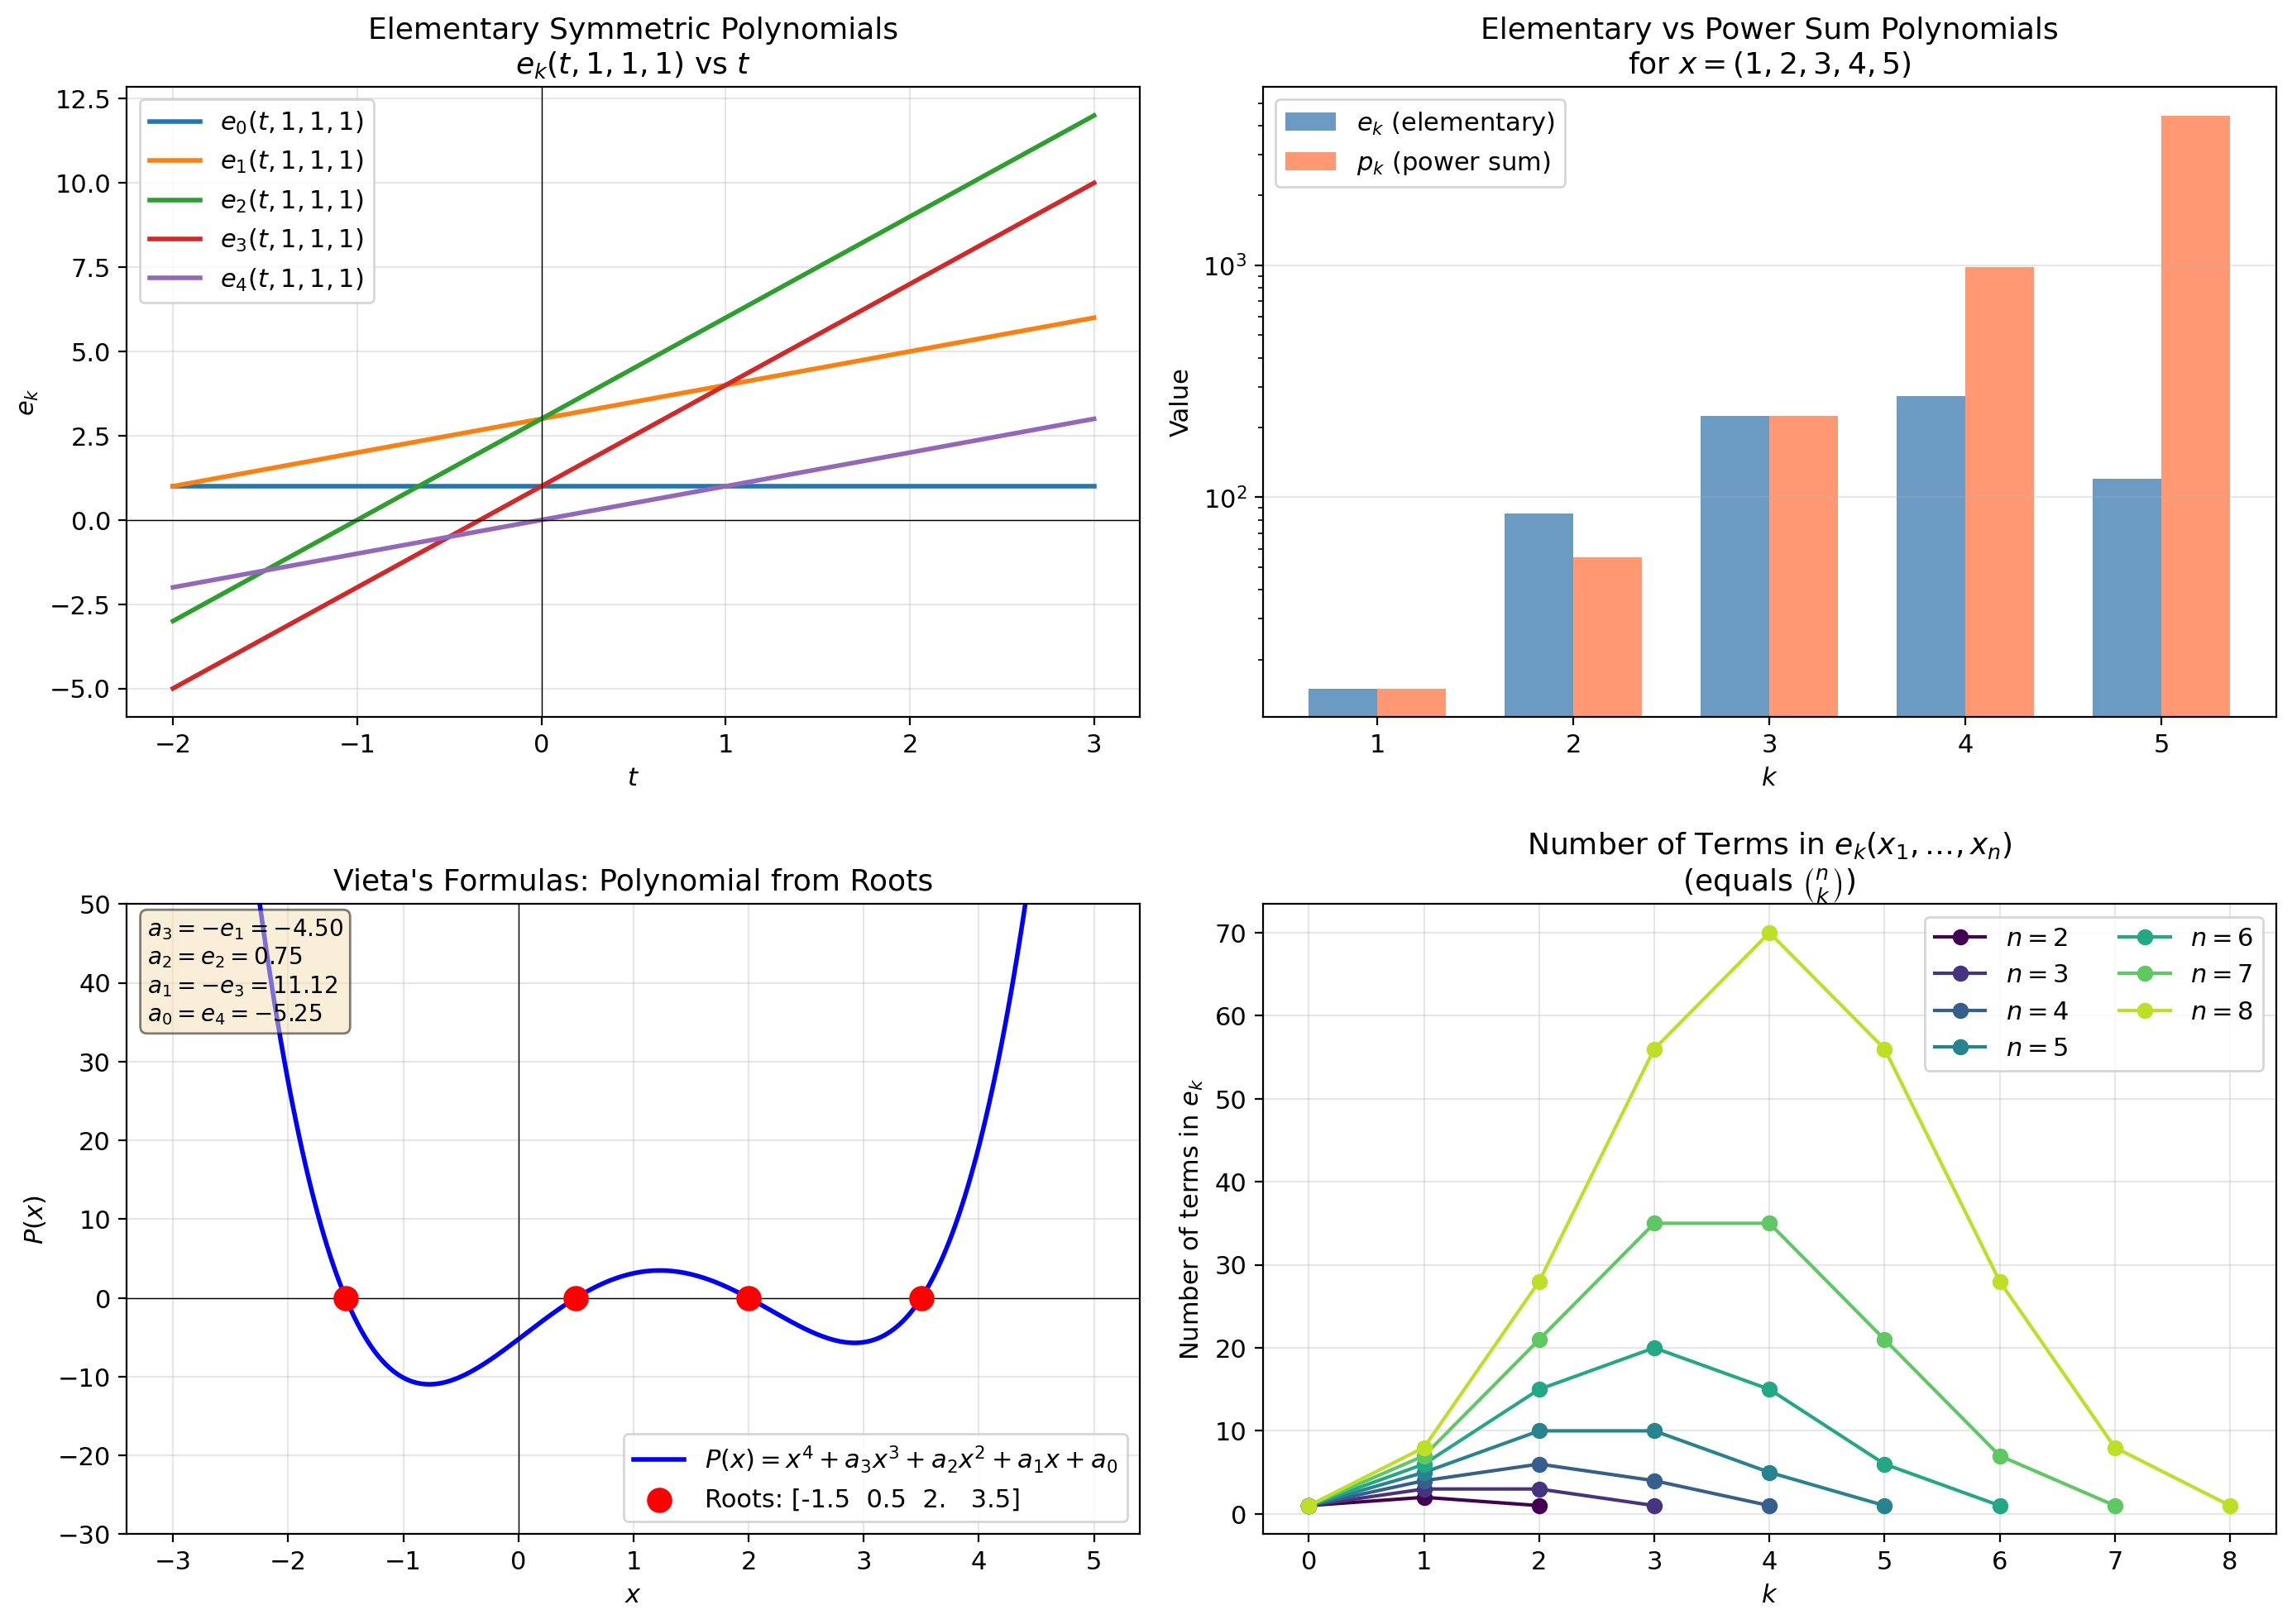


Plot saved to 'plot.png'


In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Plot 1: e_k(t, 1, 1, 1) as functions of t ---
ax1 = axes[0, 0]
t_range = np.linspace(-2, 3, 200)

for k in range(5):
    e_k_values = []
    for t in t_range:
        variables = [t, 1, 1, 1]
        e_k_values.append(elementary_symmetric(k, variables))
    ax1.plot(t_range, e_k_values, label=f'$e_{k}(t,1,1,1)$', linewidth=2)

ax1.set_xlabel('$t$')
ax1.set_ylabel('$e_k$')
ax1.set_title('Elementary Symmetric Polynomials\n$e_k(t, 1, 1, 1)$ vs $t$')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# --- Plot 2: e_k vs p_k relationship ---
ax2 = axes[0, 1]
n_vars = 5
k_range = range(1, n_vars + 1)

# Use variables [1, 2, 3, 4, 5]
x = np.array([1, 2, 3, 4, 5], dtype=float)

e_values = [elementary_symmetric(k, x) for k in k_range]
p_values = [power_sum(k, x) for k in k_range]

bar_width = 0.35
x_pos = np.arange(len(k_range))

bars1 = ax2.bar(x_pos - bar_width/2, e_values, bar_width, label='$e_k$ (elementary)', color='steelblue', alpha=0.8)
bars2 = ax2.bar(x_pos + bar_width/2, p_values, bar_width, label='$p_k$ (power sum)', color='coral', alpha=0.8)

ax2.set_xlabel('$k$')
ax2.set_ylabel('Value')
ax2.set_title('Elementary vs Power Sum Polynomials\nfor $x = (1, 2, 3, 4, 5)$')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'{k}' for k in k_range])
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_yscale('log')

# --- Plot 3: Vieta's formulas - polynomial and its roots ---
ax3 = axes[1, 0]

roots = np.array([-1.5, 0.5, 2.0, 3.5])
coeffs = vieta_coefficients(roots)

# Plot polynomial
x_plot = np.linspace(-3, 5, 300)
y_plot = np.polyval(coeffs, x_plot)

ax3.plot(x_plot, y_plot, 'b-', linewidth=2, label='$P(x) = x^4 + a_3 x^3 + a_2 x^2 + a_1 x + a_0$')
ax3.scatter(roots, np.zeros_like(roots), color='red', s=100, zorder=5, label=f'Roots: {roots}')
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)

# Annotate coefficients
coeff_text = f'$a_3 = -e_1 = {coeffs[1]:.2f}$\n$a_2 = e_2 = {coeffs[2]:.2f}$\n$a_1 = -e_3 = {coeffs[3]:.2f}$\n$a_0 = e_4 = {coeffs[4]:.2f}$'
ax3.text(0.02, 0.98, coeff_text, transform=ax3.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax3.set_xlabel('$x$')
ax3.set_ylabel('$P(x)$')
ax3.set_title("Vieta's Formulas: Polynomial from Roots")
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)
ax3.set_ylim(-30, 50)

# --- Plot 4: Number of terms in e_k ---
ax4 = axes[1, 1]

n_values = range(2, 9)
colors = plt.cm.viridis(np.linspace(0, 0.9, len(n_values)))

for n, color in zip(n_values, colors):
    k_vals = range(0, n + 1)
    # Number of terms in e_k is C(n, k)
    num_terms = [comb(n, k) for k in k_vals]
    ax4.plot(k_vals, num_terms, 'o-', color=color, label=f'$n={n}$', linewidth=1.5, markersize=6)

ax4.set_xlabel('$k$')
ax4.set_ylabel('Number of terms in $e_k$')
ax4.set_title('Number of Terms in $e_k(x_1, \ldots, x_n)$\n(equals $\\binom{n}{k}$)')
ax4.legend(loc='upper right', ncol=2)
ax4.grid(True, alpha=0.3)
ax4.set_xticks(range(0, 9))

plt.tight_layout()
plt.savefig('plot.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Advanced: Schur Polynomials

Schur polynomials $s_\lambda$ form an important basis for symmetric polynomials, indexed by integer partitions $\lambda$. They generalize the elementary and complete homogeneous symmetric polynomials and have deep connections to representation theory.

For a partition $\lambda = (\lambda_1, \lambda_2, \ldots, \lambda_n)$, the Schur polynomial can be defined via the **Jacobi-Trudi identity**:

$$s_\lambda = \det(h_{\lambda_i - i + j})_{1 \leq i,j \leq n}$$

where $h_k$ is the $k$-th complete homogeneous symmetric polynomial.

In [9]:
def complete_homogeneous_recursive(k, variables, memo=None):
    """
    Compute h_k using the recursive relation with elementary symmetric polynomials.
    
    h_k = sum_{i=0}^{k-1} (-1)^i * e_{i+1} * h_{k-1-i} for k >= 1, h_0 = 1
    """
    if memo is None:
        memo = {}
    
    if k in memo:
        return memo[k]
    
    if k < 0:
        return 0.0
    if k == 0:
        return 1.0
    
    # Use Newton-Girard style recurrence
    result = 0.0
    for i in range(k):
        e_val = elementary_symmetric(i + 1, variables)
        h_val = complete_homogeneous_recursive(k - 1 - i, variables, memo)
        result += ((-1)**i) * e_val * h_val
    
    # Adjust sign based on relation h_k - e_1*h_{k-1} + e_2*h_{k-2} - ... = 0 for k > n
    # Actually use: h_k = e_1*h_{k-1} - e_2*h_{k-2} + ... + (-1)^{k-1}*e_k
    result = 0.0
    for i in range(1, k + 1):
        e_val = elementary_symmetric(i, variables)
        h_val = complete_homogeneous_recursive(k - i, variables, memo)
        result += ((-1)**(i-1)) * e_val * h_val
    
    memo[k] = result
    return result


# Simpler direct computation for h_k
def complete_homogeneous_direct(k, variables):
    """
    Compute h_k directly as sum over all monomials of degree k.
    Uses recursion: h_k = sum_{i=1}^{n} x_i * h_{k-1}(all vars) adjusted
    Actually h_k satisfies: sum over weak compositions of k into n parts.
    """
    n = len(variables)
    if k == 0:
        return 1.0
    if k < 0:
        return 0.0
    
    # Generate all weak compositions of k into n parts
    def weak_compositions(total, parts):
        if parts == 1:
            yield [total]
        else:
            for i in range(total + 1):
                for rest in weak_compositions(total - i, parts - 1):
                    yield [i] + rest
    
    result = 0.0
    for comp in weak_compositions(k, n):
        term = 1.0
        for idx, exp in enumerate(comp):
            term *= variables[idx] ** exp
        result += term
    return result


# Test complete homogeneous symmetric polynomials
x = np.array([1.0, 2.0, 3.0])

print("Complete Homogeneous Symmetric Polynomials h_k")
print("="*50)
print(f"Variables: x = {x}")
print()

for k in range(5):
    h_k = complete_homogeneous_direct(k, x)
    print(f"h_{k}(x) = {h_k:.0f}")

print("\nVerification:")
print(f"h_0 = 1")
print(f"h_1 = x_1 + x_2 + x_3 = {sum(x):.0f}")
print(f"h_2 = x_1² + x_2² + x_3² + x_1x_2 + x_1x_3 + x_2x_3 = {x[0]**2 + x[1]**2 + x[2]**2 + x[0]*x[1] + x[0]*x[2] + x[1]*x[2]:.0f}")

Complete Homogeneous Symmetric Polynomials h_k
Variables: x = [1. 2. 3.]

h_0(x) = 1
h_1(x) = 6
h_2(x) = 25
h_3(x) = 90
h_4(x) = 301

Verification:
h_0 = 1
h_1 = x_1 + x_2 + x_3 = 6
h_2 = x_1² + x_2² + x_3² + x_1x_2 + x_1x_3 + x_2x_3 = 25


## Summary

In this notebook, we explored the theory and computation of symmetric polynomials:

1. **Elementary symmetric polynomials** $e_k$ — sums over all $k$-subsets of products
2. **Power sum symmetric polynomials** $p_k$ — sums of $k$-th powers
3. **Complete homogeneous symmetric polynomials** $h_k$ — sums over all monomials of degree $k$

Key results verified:
- **Newton's identities** connecting $e_k$ and $p_k$
- **Vieta's formulas** relating polynomial coefficients to elementary symmetric polynomials of roots
- **Generating function** identity for elementary symmetric polynomials
- **Symmetry** under variable permutations

These polynomials are fundamental in:
- **Galois theory**: Understanding solvability of polynomial equations
- **Representation theory**: Characters of symmetric groups
- **Algebraic combinatorics**: Counting and enumeration
- **Invariant theory**: Polynomials unchanged under group actions